In [1]:
import torch

## Self-Attention Multi Head attention mask

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
sample_sequence = torch.rand((4, 4, 9, 9)) # B x L x D

attention_mask = torch.as_tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0],
                                  [1, 1, 0, 0, 0, 0, 0, 0, 0],
                                  [1, 1, 1, 1, 1, 1, 1, 0, 0],
                                  [1, 1, 1, 1, 0, 1, 1, 1, 0]])

<Axes: >

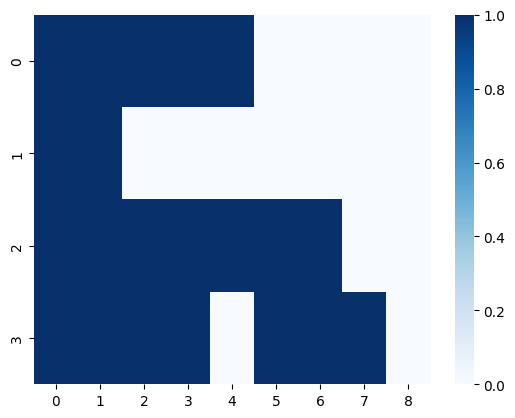

In [82]:
sns.heatmap(attention_mask, cmap="Blues")

<Axes: >

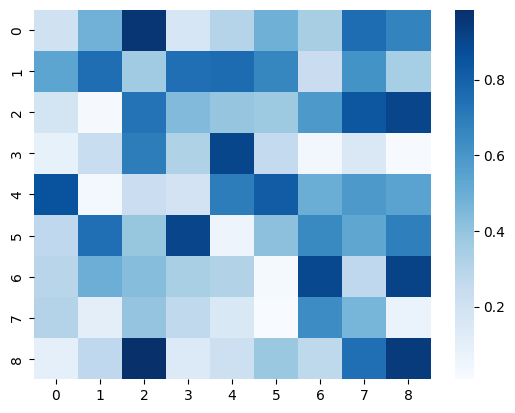

In [93]:
sns.heatmap(sample_sequence[0, 0], cmap="Blues")

In [84]:
extended_attention_mask = attention_mask[:, None, None, :]

In [85]:
dtype=sample_sequence.dtype

extended_attention_mask = extended_attention_mask.to(dtype=dtype)  # fp16 compatibility
extended_attention_mask = (1.0 - extended_attention_mask) * torch.finfo(dtype).min

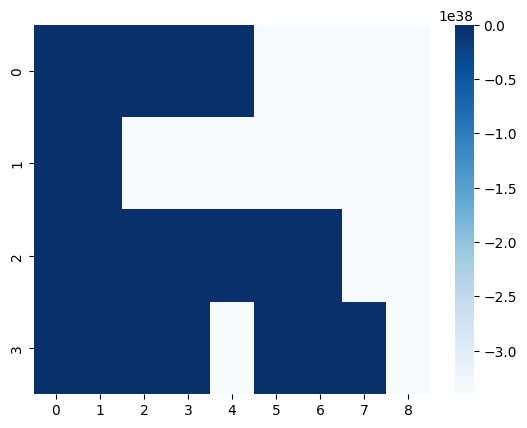

In [86]:
for i in range(extended_attention_mask.size()[1]):
    sns.heatmap(extended_attention_mask[:, 0, 0, :], cmap="Blues")


In [65]:
sample_masked_seqeuence = sample_sequence + extended_attention_mask

In [102]:
softmax_sample_masked_sequence = torch.nn.functional.softmax(sample_masked_seqeuence, dim = -1)

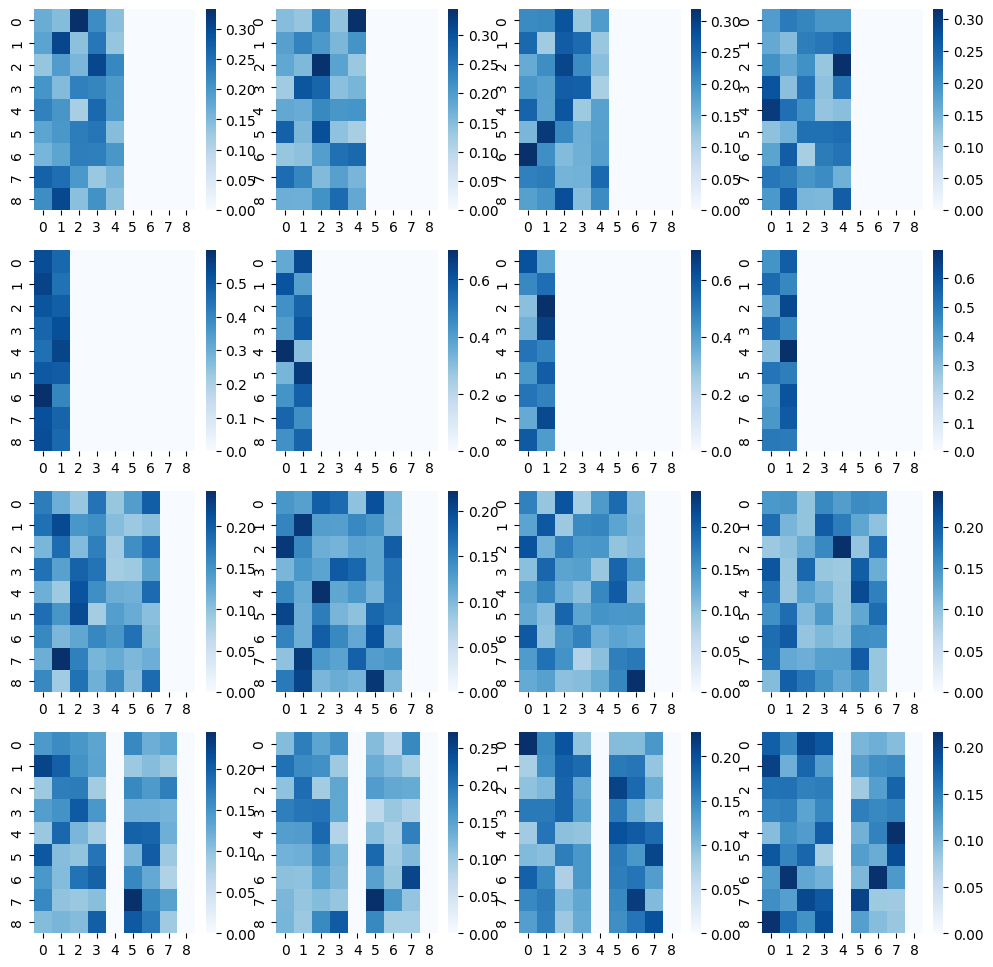

In [103]:
fig, axs = plt.subplots(softmax_sample_masked_sequence.size()[0], softmax_sample_masked_sequence.size()[1], figsize=(12, 12))

for i in range(softmax_sample_masked_sequence.size()[0]):
    for j in range(softmax_sample_masked_sequence.size()[1]):
        sns.heatmap(softmax_sample_masked_sequence[i, j, :, :], cmap="Blues", ax=axs[i][j])

## Casual Attention Masking

In [113]:
batch_size, _, seq_length, _ = sample_sequence.size()
device = sample_sequence.device

seq_ids = torch.arange(seq_length, device=device)
causal_mask = seq_ids[None, None, :].repeat(batch_size, seq_length, 1) <= seq_ids[None, :, None]

In [116]:
causal_mask = causal_mask.to(attention_mask.dtype)

<Axes: >

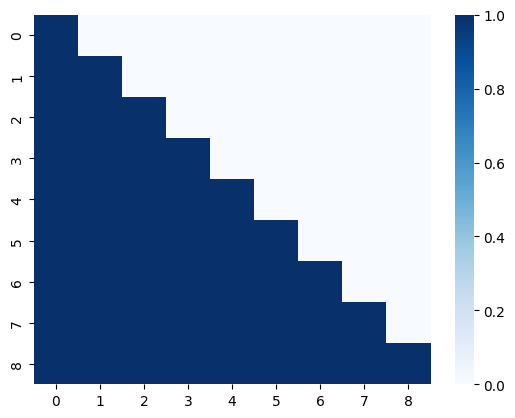

In [119]:
sns.heatmap(causal_mask[0, :, :], cmap="Blues")

In [120]:
extended_attention_mask = causal_mask[:, None, :, :] * attention_mask[:, None, None, :]

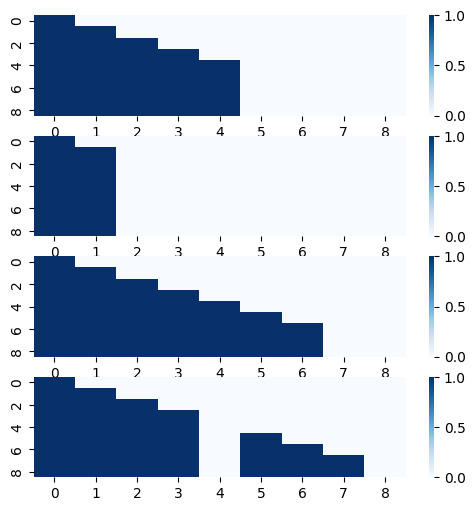

In [127]:
fig, axs = plt.subplots(extended_attention_mask.size()[0], extended_attention_mask.size()[1], figsize=(6, 6))

for i in range(extended_attention_mask.size()[0]):
    sns.heatmap(extended_attention_mask[i, 0, :, :], cmap="Blues", ax=axs[i])
        

In [133]:
extended_attention_mask = (1.0 - extended_attention_mask) * torch.finfo(dtype).min

In [135]:
sample_masked_seqeuence = sample_sequence + extended_attention_mask

softmax_sample_masked_sequence = torch.nn.functional.softmax(sample_masked_seqeuence, dim = -1)

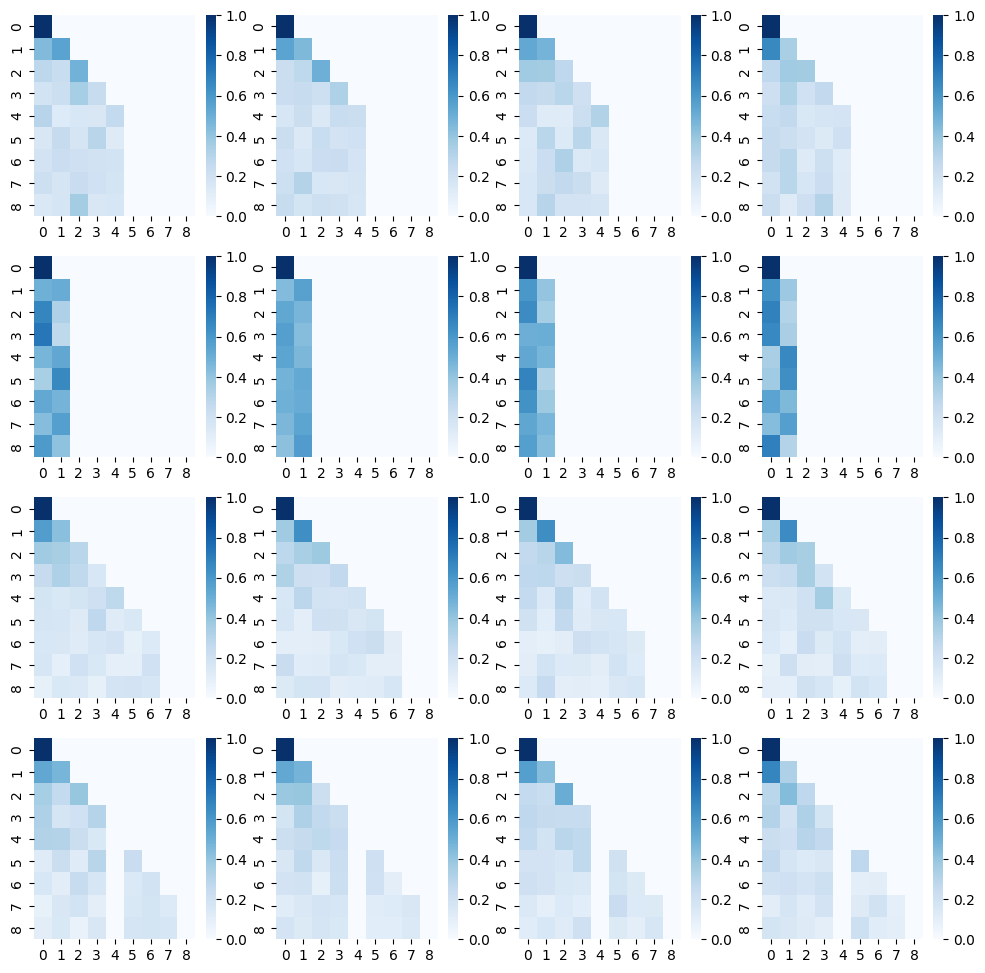

In [136]:
fig, axs = plt.subplots(softmax_sample_masked_sequence.size()[0], softmax_sample_masked_sequence.size()[1], figsize=(12, 12))

for i in range(softmax_sample_masked_sequence.size()[0]):
    for j in range(softmax_sample_masked_sequence.size()[1]):
        sns.heatmap(softmax_sample_masked_sequence[i, j, :, :], cmap="Blues", ax=axs[i][j])

## Cross Attention

In [279]:
decoder_input_seq_length = 4
encoders_output_seq_length = 9

attention_mask = torch.as_tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0],
                                  [1, 1, 0, 0, 0, 0, 0, 0, 0],
                                  [1, 1, 1, 1, 1, 1, 1, 0, 0],
                                  [1, 1, 1, 1, 0, 1, 1, 1, 0]], dtype=torch.float32)

In [280]:
device = attention_mask.device
dtype = attention_mask.dtype

In [281]:
causal_mask = torch.full((decoder_input_seq_length, encoders_output_seq_length), fill_value=1,
                         dtype=dtype,
                         device=device)

casual_mask = causal_mask[None, None, :, :].expand(batch_size, 1, -1, -1)
padding_mask = attention_mask[:, None, None, :]

In [283]:
casual_mask = (causal_mask * padding_mask).to(dtype)

In [285]:
casual_mask = (1.0 - casual_mask) * torch.finfo(dtype).min

In [287]:
casual_mask = casual_mask.contiguous()

In [288]:
sample_sequence = torch.rand((4, 4, 4, 9)) # B x H x D_L x E_L

In [291]:
sample_masked_seqeuence = sample_sequence + casual_mask

softmax_sample_masked_sequence = torch.nn.functional.softmax(sample_masked_seqeuence, dim = -1)

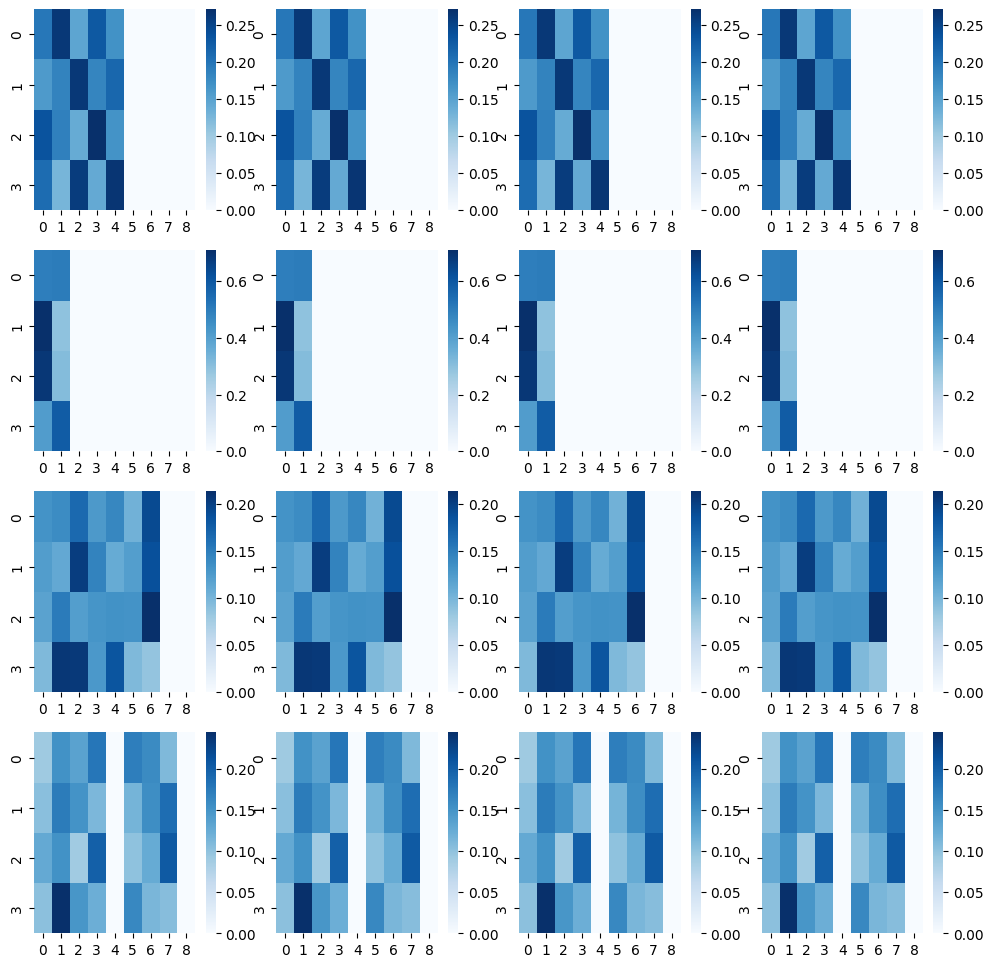

In [292]:
fig, axs = plt.subplots(softmax_sample_masked_sequence.size()[0], softmax_sample_masked_sequence.size()[1], figsize=(12, 12))

for i in range(softmax_sample_masked_sequence.size()[0]):
    for j in range(softmax_sample_masked_sequence.size()[1]):
        sns.heatmap(softmax_sample_masked_sequence[i, 0, :, :], cmap="Blues", ax=axs[i][j])